In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy.constants import eV, m_e

#Test dataset
In order to test the model, we use data from the Joy database. Below are data taken for copper. 

In [10]:
E_Cu_3, SEY_Cu_3 = np.loadtxt('data/Joy_SEY_copper_dataset3.txt', skiprows=2, unpack=True)
E_Cu_4, SEY_Cu_4 = np.loadtxt('data/Joy_SEY_copper_dataset4.txt', skiprows=2, unpack=True)
E_Cu_6, SEY_Cu_6 = np.loadtxt('data/Joy_SEY_copper_dataset6.txt', skiprows=2, unpack=True)

E_Cu_11, SEY_Cu_11 = np.loadtxt('data/Joy_SEY_copper_dataset11.txt', skiprows=2, unpack=True)
E_Cu_13, SEY_Cu_13 = np.loadtxt('data/Joy_SEY_copper_dataset13.txt', skiprows=2, unpack=True)

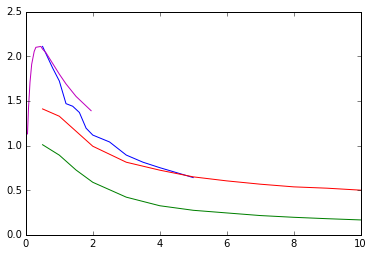

In [11]:
plot(E_Cu_3, SEY_Cu_3, E_Cu_4, SEY_Cu_4, E_Cu_6, SEY_Cu_6)
plot(E_Cu_11, SEY_Cu_11, E_Cu_13, SEY_Cu_13)


#Backscattered electrons

The experimental data suggest that the SEY for backscattered electrons has the following form: 
$$
\delta_e(E_0, \theta_0=0)
=
P_{1,e}(\infty) + \left[\hat{P}_{1,e} - P_{1,e}(\infty) \right] e^{-\left(|E_0 - \hat{E}_e|/W \right)^p/p} 
$$


In [67]:
def delta_e(E_0, E_e, P_1e_inf, P_1e_max, w, p):
    return P_1e_inf \
        + (P_1e_max - P_1e_inf)*exp(-(abs(E_0 - E_e)/w)**p / p)

(0, 1.7)

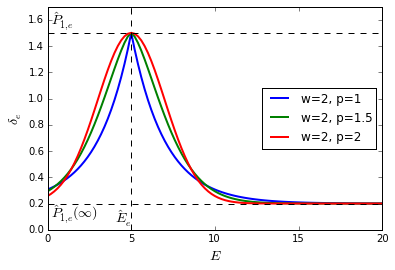

In [89]:
E = linspace(0, 20, 101)

E_e = 5
P_1e_inf = 0.2
P_1e_max = 1.5
w = 2
p = 1.5

plot(E, delta_e(E, E_e, P_1e_inf, P_1e_max, w, 1), lw=2)
plot(E, delta_e(E, E_e, P_1e_inf, P_1e_max, w, 1.5), lw=2)
plot(E, delta_e(E, E_e, P_1e_inf, P_1e_max, w, 2), lw=2)

axvline(x = E_e, color='k', ls='--')
text(E_e, 0.05, '$\hat{E}_e$', horizontalalignment='right', fontsize=14)
axhline(y=P_1e_max, color='k', ls='--')
text(0.2, P_1e_max, '$\hat{P}_{1,e}$', verticalalignment='bottom', fontsize=14)
axhline(y=P_1e_inf, color='k', ls='--')
text(0.2, P_1e_inf, '$\hat{P}_{1,e}(\infty)$', verticalalignment='top', fontsize=14)

legend(('w=2, p=1', 'w=2, p=1.5', 'w=2, p=2'), loc='best')
ylabel('$\delta_e$', fontsize=14)
xlabel('$E$', fontsize=14)
ylim(0, 1.7)

#Rediffused electrons
A form for $\delta_r$ might be given by:
$$
\delta_r(E_0. \theta_0=0)
=
P_{1,r}(\infty) 
\left[
1 - e^{-\left( E_0/E_r \right)^r}
\right]
$$

In [90]:
def delta_r(E_0, E_r, P_1r_inf, r):
    return P_1r_inf * (1 - exp(-(E_0/E_r)**r))

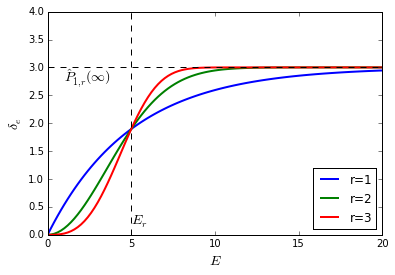

In [105]:
E_r = 5
P_1r_inf = 3

plot(E, delta_r(E, E_r, P_1r_inf, 1), lw=2)
plot(E, delta_r(E, E_r, P_1r_inf, 2), lw=2)
plot(E, delta_r(E, E_r, P_1r_inf, 3), lw=2)

ylim(0, 4)
axvline(x=E_r, color='k', ls='--')
text(E_r, 0.4, '$E_r$', verticalalignment='top', fontsize=14)
axhline(y=P_1r_inf, color='k', ls='--')
text(1, P_1r_inf, '$\hat{P}_{1,r}(\infty)$', verticalalignment='top', fontsize=14)

legend(('r=1', 'r=2', 'r=3'), loc='best')
ylabel('$\delta_e$', fontsize=14)
xlabel('$E$', fontsize=14)


#True-secondary electrons
The energy and angular dependence of $\delta_{ts}$ are well fit by:
$$
\delta_{ts} (E_0. \theta_0)
=
\hat{\delta}(\theta_0) 
D\left[
\frac{E_0}{\hat{E}(\theta_0)}
\right]
$$
with
$$
D(x) = \frac{s x}{s - 1 + x^s}
$$

In [108]:
def D(x, s):
    return s*x/(s - 1 + x**s)

def delta_ts(E_0, E_max, delta_max, s):
    return delta_max * D(E_0/E_max, s)

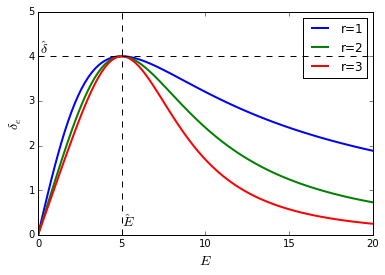

In [121]:
E_max = 5
delta_max = 4

plot(E, delta_ts(E, E_max, delta_max, 2), lw=2)
plot(E, delta_ts(E, E_max, delta_max, 3), lw=2)
plot(E, delta_ts(E, E_max, delta_max, 4), lw=2)

ylim(0, 5)
axhline(y=delta_max, color= 'k', ls= '--')
text(0.1, delta_max, '$\hat{\delta}$', verticalalignment='bottom', fontsize=14)

axvline(x=E_max, color= 'k', ls= '--')
text(E_max, 0.5, '$\hat{E}$', verticalalignment='top', fontsize=14)


legend(('r=1', 'r=2', 'r=3'), loc='best')
ylabel('$\delta_e$', fontsize=14)
xlabel('$E$', fontsize=14)